## PMFs

In [11]:
%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [12]:
pmf = thinkstats2.Pmf([1,2,2,3,5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

`Hist`: maps from values to integer counters

`pmf`: maps from values to floating point probabilities

## Plotting PMFs

In [13]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

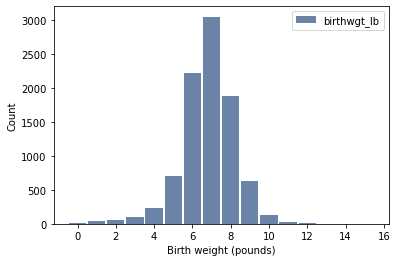

In [14]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

To create a `pmf` we need to normalize. `thinkstats2.Pmf` does this work for us

In [15]:
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

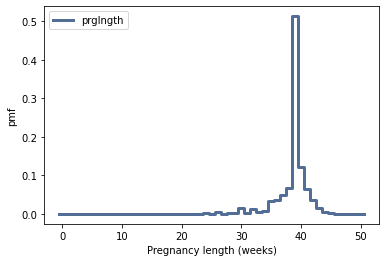

In [16]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='pmf')

In [19]:
preg = nsfg.ReadFemPreg()

live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [20]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

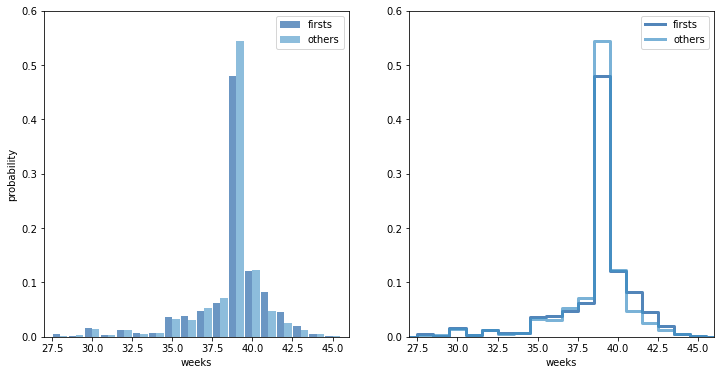

<Figure size 576x432 with 0 Axes>

In [24]:
width=0.45
axis = [27, 46, 0, 0.6]

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='weeks',
                 ylabel='probability',
                 axis=axis)
thinkplot.PrePlot(2) # resets the color generator
thinkplot.SubPlot(2) # switches to the second figure
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks', axis=axis)

## Other Visualizations

### Differences in distributions

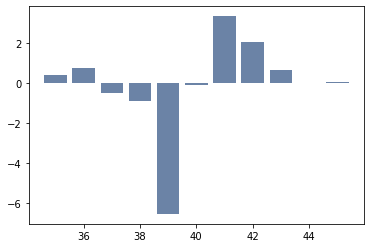

In [29]:
weeks = range(35,46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)

### The class size paradox

At many American colleges and universities, the student-to-faculty ratio is about 10:1. But students are often surprised to discover that their average class size is bigger than 10. There are two reasons for the discrepancy:
- Students typically take 4–5 classes per semester, but professors often teach 1 or 2.
- The number of students who enjoy a small class is small, but the number of students in a large class is large.

In [32]:
# College with 65 classes in a semester
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')
print(f'mean: {pmf.Mean()}')

mean: 23.692307692307693


In [33]:
# From the point of view of students
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x,x) # each class is observed by #students/class

    new_pmf.Normalize()
    return new_pmf

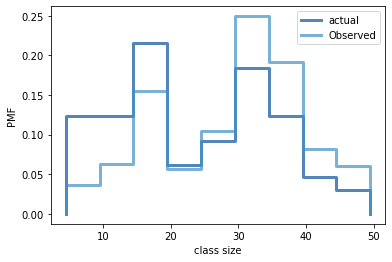

<Figure size 576x432 with 0 Axes>

In [34]:
biased_pmf = BiasPmf(pmf, label='Observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

In [35]:
print(biased_pmf.Mean())

29.123376623376625


## DataFrame indexing

In [37]:
import pandas as pd
import numpy as np

array = np.random.randn(4,2)
df = pd.DataFrame(array)
df

,0,1
0,-0.204730,0.750187
1,0.316984,0.074774
2,1.272735,1.079140
3,0.238477,-0.561558


In [38]:
# changing column names
columns = ['A', 'B']
df = pd.DataFrame(array, columns=columns)
df

,A,B
0,-0.204730,0.750187
1,0.316984,0.074774
2,1.272735,1.079140
3,0.238477,-0.561558


In [39]:
index = list('abcd')
df = pd.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-0.204730,0.750187
b,0.316984,0.074774
c,1.272735,1.079140
d,0.238477,-0.561558


In [40]:
# simple indexing - columns
df ['A']

a   -0.204730
b    0.316984
c    1.272735
d    0.238477
Name: A, dtype: float64

In [42]:
# row indexing using row label
df.loc['a']

A   -0.204730
B    0.750187
Name: a, dtype: float64

In [43]:
# row indexing using row position
df.iloc[2]

A    1.272735
B    1.079140
Name: c, dtype: float64

In [47]:
# row indexing with list of labels
df.loc[['a','c']]

,A,B
a,-0.204730,0.750187
c,1.272735,1.079140


In [48]:
df.iloc[0:2]

,A,B
a,-0.204730,0.750187
b,0.316984,0.074774


## Exercises

In [50]:
resp = nsfg.ReadFemResp()

In [51]:
resp.numkdhh

0       3
1       0
2       0
3       0
4       0
       ..
7638    0
7639    0
7640    0
7641    0
7642    0
Name: numkdhh, Length: 7643, dtype: int64

In [62]:
pmf_minors = thinkstats2.Pmf(resp['numkdhh'], label='actual')

In [63]:
biased_pmf_minors = BiasPmf(pmf_minors, label = 'observed')

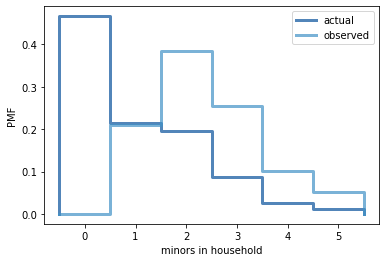

<Figure size 576x432 with 0 Axes>

In [65]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_minors, biased_pmf_minors])
thinkplot.Show(xlabel='minors in household', ylabel='PMF')

No minor children would observe a family with 0 minors in household, even though they are the most frequent arrangement.

In [70]:
print(f'mean (actual): {pmf_minors.Mean():.2f}, mean (observed): {biased_pmf_minors.Mean():.2f}')

mean (actual): 1.02, mean (observed): 2.40


In [83]:
# Functions for mean and variance for pmfs
def PmfMean(pmf):
    cumul = 0.
    for q, f in pmf.Items():
        cumul += q*f
    return cumul

def PmfVar(pmf):
    cumul = 0.
    for q, f in pmf.Items():
        cumul += f * (q - PmfMean(pmf))**2
    return cumul

**Exercise 3.3**

In [89]:
live = preg[preg.outcome == 1]
preg_map = nsfg.MakePregMap(live)

In [110]:
from collections import defaultdict

two_or_more_births = defaultdict(list)
for case, births in preg_map.items():
    if len(births) >=2:
        two_or_more_births[case] = births
